In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
np.shape(perch_length)

(56,)

<function matplotlib.pyplot.show(close=None, block=None)>

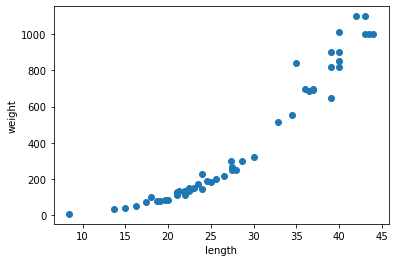

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

In [5]:
#데이터 분할

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
perch_length, perch_weight, random_state = 18)

print(np.shape(train_input))
print(np.shape(test_input))

(42,)
(14,)


In [6]:
train_input = train_input.reshape(-1, 1) # 변환
test_input = test_input.reshape(-1, 1)

print(np.shape(train_input))
print(np.shape(test_input))

(42, 1)
(14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [8]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [9]:
# R^2
knr.score(test_input, test_target)

0.9248273704029688

In [10]:
from sklearn.metrics import mean_absolute_error

In [11]:
test_prediction = knr.predict(test_input)
print(test_prediction)
print()
print(test_target)

[198. 117. 858. 229. 229. 569. 970. 229. 127. 723. 970. 141. 229. 174.]

[ 188.  125.  650.  300.  250.  514. 1100.  260.  130.  556. 1000.  150.
  265.  145.]


In [12]:
mae = mean_absolute_error(test_target, test_prediction)

print(mae)

57.714285714285715


In [13]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_target, test_prediction)

print(mse)

7200.857142857143


In [14]:
knr = KNeighborsRegressor()
r2_train = []
r2_test = []
neighbor_n = []

for n in range(1, 21):
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    r2_train.append(knr.score(train_input, train_target))
    r2_test.append(knr.score(test_input, test_target))
    neighbor_n.append(n)
    
print(r2_train)
print(r2_test)
print(neighbor_n)

[0.9909626604539287, 0.9921166692515713, 0.9896443616325816, 0.9886251202535614, 0.985984108475348, 0.9816995303072257, 0.9832055035341443, 0.9804695158191586, 0.976860365385182, 0.9700306797998369, 0.9632441540419345, 0.9618366212507524, 0.9517762622427662, 0.9550964310755695, 0.9442193923513246, 0.9344536125648618, 0.9208661120377768, 0.9038360525749365, 0.882043961740988, 0.8579684163186536]
[0.7994546478633184, 0.9206568300175366, 0.9142757052106307, 0.912780815205306, 0.9248273704029688, 0.9024710220092916, 0.9272456285487161, 0.9305681084312803, 0.9192988794659098, 0.9042548992611195, 0.8951736624884379, 0.8728225557918328, 0.8687045371373334, 0.8679294739383074, 0.8576141968741275, 0.8303188744089556, 0.8089259910909494, 0.7921716104305297, 0.7704731811663179, 0.7594069126405957]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


<function matplotlib.pyplot.show(close=None, block=None)>

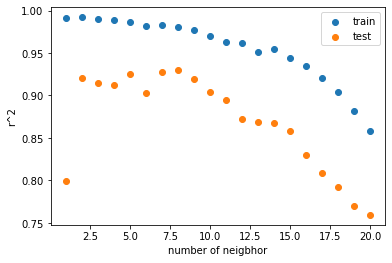

In [15]:
plt.scatter(neighbor_n, r2_train, label = 'train')
plt.scatter(neighbor_n, r2_test, label = 'test')

plt.xlabel('number of neigbhor')
plt.ylabel('r^2')
plt.legend()

plt.show